In [1]:
# linear regression from scratch

%matplotlib inline
import random
import torch
from d2l import torch as d2l

# generate the noise which follows y=Xw+b
def synthetic_data(w, b, num_examples):
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [2]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [3]:
print('features: ', features[0], '\nlable: ', labels[0])  # each line in the features contains a data sample that is 1*2, and each line in the labels contains a one dimensional label value

features:  tensor([ 0.8255, -1.0836]) 
lable:  tensor([9.5469])


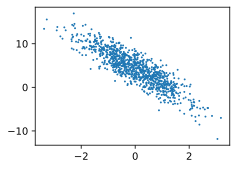

In [4]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

In [5]:
def data_iter(batch_size, features, labels):
    """it generates batches which contains a group of feature and label in each batch"""
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]
        '''
        about yield statement:
        yield statement is a way to build a generator, and we could regard it as a 'cousin' of the 'return'
        a generator is quite different with the function, although both of them are created to do some operations and return data. But each time after the function 'yield' datas from the generator, the generator will be fixed.
        It means that the function is waiting there for the next invoke
        '''

In [6]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[-0.9226, -0.9245],
        [-1.3451, -0.5419],
        [ 0.4755, -0.2395],
        [ 0.5571,  1.4091],
        [ 1.0952,  0.9364],
        [-0.6690,  0.1585],
        [-1.0415,  0.2961],
        [ 1.9940, -0.8174],
        [ 0.3697, -0.0220],
        [-1.3232,  1.5727]]) 
 tensor([[ 5.5133],
        [ 3.3636],
        [ 5.9727],
        [ 0.5241],
        [ 3.2076],
        [ 2.3210],
        [ 1.1076],
        [10.9717],
        [ 5.0271],
        [-3.7928]])


In [7]:
# initialize parameters of model
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [8]:
def linreg(X, w, b):
    """linear regression model"""
    return torch.matmul(X, w) + b

In [10]:
def square_loss(y_hat, y):
    """square loss function"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

In [11]:
def sgd(params, lr, batch_size):
    """batch size random gradient decrease"""
    with torch.no_grad():
        for param in params:
            '''
            each step of update is depends on the lr.
            As we are computing the total loss of the whole sample, so we use the batch size to standardization the length of each step, so it won't be influenced by the batch size
            '''
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [18]:
lr = 0.03
num_epochs = 3
net = linreg
loss = square_loss

In [19]:
for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        # l is a (batch_size, 1) vector, so we have to add all its elements together to generate a scalar quantity
        # so that we could compute its gradient
        l.sum().backward()
        sgd([w, b], lr, batch_size)  # use the gradient of the parameters to update the parameters
    with torch.no_grad():  # only used to compute the loss, so the grad is no need. In addition, it may cause more memory waste
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()): f}')

epoch 1, loss  0.000049
epoch 2, loss  0.000049
epoch 3, loss  0.000049
